<a href="https://colab.research.google.com/github/zamroni552/Pemograman-Python/blob/main/udahhfixpalingfixx_fixsko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#---Kabel FO G.652 - SI-SM
L=154 #km
L1= np.arange(1,155,1)
Hspl=2 #km
disp_M= 6e-12 #s/km.nm
alpha_f=0.2 #dB/km

In [14]:
#---Sepesifikasi Pengirim 
Ptx=8 #mw
Ptx_db= 10*log10(Ptx)
spektral=0.1 #nm
t_tx=6e-11 #s
Mod_NRZ=0.7 #NRZ
Mod_RZ=0.35 #RZ
Br= 2.4e9 #2.4 Gbps
Tb=1/Br #s

In [15]:
#---Sepesifikasi Penerima 
sensitivitas=-38
t_rx=35e-12 #s

In [16]:
#---Spesifikasi Kanal
N_c=2
alpha_c=0.2 #0.2 dB/titik
N_sp=(L/Hspl)-1
alpha_sp=0.05 #dB/titik
Ms=3 #dB

In [17]:
def nilai(N_c,alpha_c,N_sp,alpha_sp,L,alpha_f,Ms):
  alpha_z=N_c*alpha_c+N_sp*alpha_sp+L*alpha_f+Ms
  Prx=Ptx_db-alpha_z

  if Prx > sensitivitas:
    c='LPB,terpenuhi'
  else:
    c='Hitung Ulang!!!'
  return alpha_z,Prx,c
s,s1,c=nilai(N_c,alpha_c,N_sp,alpha_sp,L,alpha_f,Ms)

print("Redaman Kabel:",s,'\n')
print("Daya Terima:",s1,'\n')
print(c)

Redaman Kabel: 38.0 

Daya Terima: -28.969100130080562 

LPB,terpenuhi


In [18]:
def nilai(disp_M,L,spektral):
  t_mat=disp_M*L*spektral
  t_wg=0
  t_mod=0

  t_sys=sqrt(t_tx**2+t_mat**2+t_mod**2+t_wg**2+t_rx**2)
  
  if (Tb*Mod_NRZ > t_sys) & (Tb*Mod_RZ > t_sys) :
    d="RTB, terpenuhi"
  elif Tb*Mod_NRZ > t_sys :
    d="RTB untuk NRZ, terpenuhi"
  elif Tb*Mod_RZ > t_sys :
    d="RTB untuk RZ, terpenuhi"
  else:
    d="Hitung Ulang !!"
  return t_sys,d

a,d=nilai(disp_M,L,spektral)
print("t_sys/Rise Time Sistem:\n",a,'\n\n')
print(d)

t_sys/Rise Time Sistem:
 1.1559740481516011e-10 


RTB, terpenuhi


In [ ]:
def nilai1(N_c,alpha_c,N_sp,alpha_sp,L1,alpha_f,Ms,Ptx_db,disp_M,spektral):
  alpha_z1=N_c*alpha_c+N_sp*alpha_sp+L1*alpha_f+Ms
  Prx1=Ptx_db-alpha_z1
  t_mat1=disp_M*L1*spektral
  t_wg=0
  t_mod=0

  t_sys1=np.sqrt(t_tx**2+t_mat1**2+t_mod**2+t_wg**2+t_rx**2)

  return alpha_z1,Prx1,t_sys1

q,w,e=nilai1(N_c,alpha_c,N_sp,alpha_sp,L1,alpha_f,Ms,Ptx_db,disp_M,spektral)

print("Redaman Kabel:\n",q,'\n')
print("Daya Terima:\n",w,'\n')
print("t_sys/Rise Time System:\n",e)

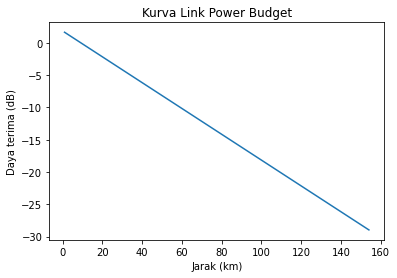

In [20]:
plt.plot(L1,w)
plt.title('Kurva Link Power Budget')
plt.xlabel('Jarak (km)')
plt.ylabel('Daya terima (dB)')
plt.show()

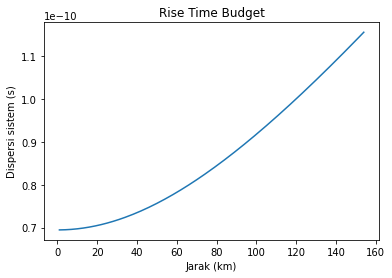

In [21]:
plt.plot(L1,e)
plt.title('Rise Time Budget')
plt.xlabel('Jarak (km)')
plt.ylabel('Dispersi sistem (s)')
plt.show()